In [61]:
#importing libraries

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit
import glob

from matplotlib import rc
rc('figure', figsize=(12.0, 9.0)) 

In [62]:
data_folder = '/Users/mmessere/Desktop/lsa-ast361/Work/mmessere/Lab7/radio-astronomy/sun_azimuth/' #referencing where the data is stored
az_files = glob.glob(data_folder + "sun*") #referencing where the as=zimuth data is stored
az_files.sort() #assorting the data in an ascending order 

In [63]:
data_folder = '/Users/mmessere/Desktop/lsa-ast361/Work/mmessere/Lab7/radio-astronomy/sun_elevation/' #referencing where the data is stored
el_files = glob.glob(data_folder + "sun*") #referencing where the as=zimuth data is stored
el_files.sort() #assorting the data in an ascending order 

## Reading in Azimuth Data

In [64]:
az_spectra = []  # Create an empty array to later hold each of the spectra from the azimuthal scans

for az_file in az_files: #Pull each individual filename from the list of azimuth files
    
    with open(az_file) as az_data: #This opens up the file and puts each line into a list called az_data
        
        spectrum_rows = []   # We create a new empty list to put the rows with our spectral data into.
        
        for j, row in enumerate(az_data, start=1): # enumerate() works a lot like range(). You get an index (j, here) which is iterated over, but you also get an object (row) corresponding to the items in the list you're iterating over (that is, inside this loop, row is the same as az_data[j])
            if j%4 == 0: # The operator "%" is called the modulus. It returns the remainder of a division (e.g. 6%4=2). So, by checking when j%4 is zero, we get every fourth row in the data (which is where our spectral data is).
                spectrum_rows.append(row) # Throw every fourth row into our list of spectral data.
                
        tot_spectrum = np.zeros(1024) #Create an array of 1024 0's.
        for row in spectrum_rows: 
            temp_spec = row.split(' ') # Our rows are actually strings. To break them up, we use the split() command, which splits a string into a list by grabbing each segment separated by the delimiter you put in the parentheses (e.g. If you do 'abc def ghi'.split(' '), you'll get the list [abc,def,ghi])
            spec = [] # Create an empty list to hold the spectral data
            for val in temp_spec: # Iterate over the elements of your split list.
                if val != '' and val != '\n': # This excludes some "nonsense" cases where elements in your split list are empty strings or end-of-line characters
                    spec.append(val) #Throw the values that are actually fluxes into your spectrum array.
                    
                    
            tot_spectrum = tot_spectrum + np.float64(spec) # Add the data from the current row to your total spectral data for this file.
            
        az_spectra.append(tot_spectrum)

## Reading in Elevation Data 

In [65]:
el_spectra = [] # Create an empty array to later hold each of the spectra from the azimuthal scans

for el_file in el_files: #Pull each individual filename from the list of azimuth files
    
    with open(el_file) as el_data: #This opens up the file and puts each line into a list called az_data
        
        spectrum_rows = [] #We create a new empty list to put the rows with our spectral data into.  
        
        for j, row in enumerate(el_data, start=1): # enumerate() works a lot like range(). You get an index (j, here) which is iterated over, but you also get an object (row) corresponding to the items in the list you're iterating over (that is, inside this loop, row is the same as az_data[j])
            if j%4 == 0: # The operator "%" is called the modulus. It returns the remainder of a division (e.g. 6%4=2). So, by checking when j%4 is zero, we get every fourth row in the data (which is where our spectral data is).
                spectrum_rows.append(row) # Throw every fourth row into our list of spectral data.
                
        tot_spectrum = np.zeros(1024) #Create an array of 1024 0's.
        for row in spectrum_rows: 
            temp_spec = row.split(' ') # Our rows are actually strings. To break them up, we use the split() command, which splits a string into a list by grabbing each segment separated by the delimiter you put in the parentheses (e.g. If you do 'abc def ghi'.split(' '), you'll get the list [abc,def,ghi])
            spec = [] # Create an empty list to hold the spectral data
            for val in temp_spec: # Iterate over the elements of your split list.
                if val != '' and val != '\n': # This excludes some "nonsense" cases where elements in your split list are empty strings or end-of-line characters
                    spec.append(val) #Throw the values that are actually fluxes into your spectrum array.
                    
                    
            tot_spectrum = tot_spectrum + np.float64(spec) # Add the data from the current row to your total spectral data for this file.
            
        el_spectra.append(tot_spectrum)
        


In [66]:
array_az_spectra = np.asarray(az_spectra) #setting data in array format
array_el_spectra = np.asarray(el_spectra) #setting data in array format

print(np.shape(array_az_spectra)) #checking shapes of arrays for the for loops used later
print(np.shape(array_el_spectra))

(20, 1024)
(15, 1024)


## The Azimuth Data 

Text(0, 0.5, 'Relative Flux')

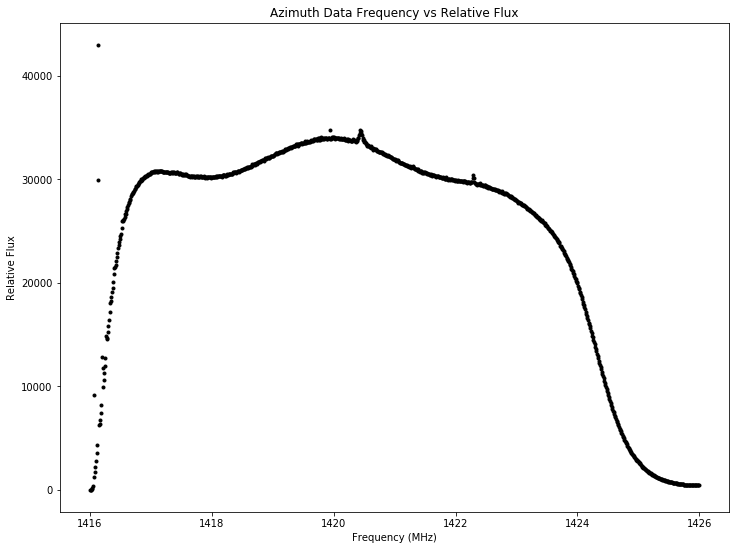

In [67]:
freq = np.arange(1416,1426,.009766) #the range of frequencies and change in frequencies used
lines = [1417,1424] #these lines used to determine where to select the data range

#for line in lines:
#plt.axvline(lines,color='r', lw = .5)
        
plt.plot(freq,array_az_spectra[1], '.k') #plotting flux as a function of frequency 

plt.title('Azimuth Data Frequency vs Relative Flux')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Relative Flux')

615


Text(0, 0.5, 'Relative Flux')

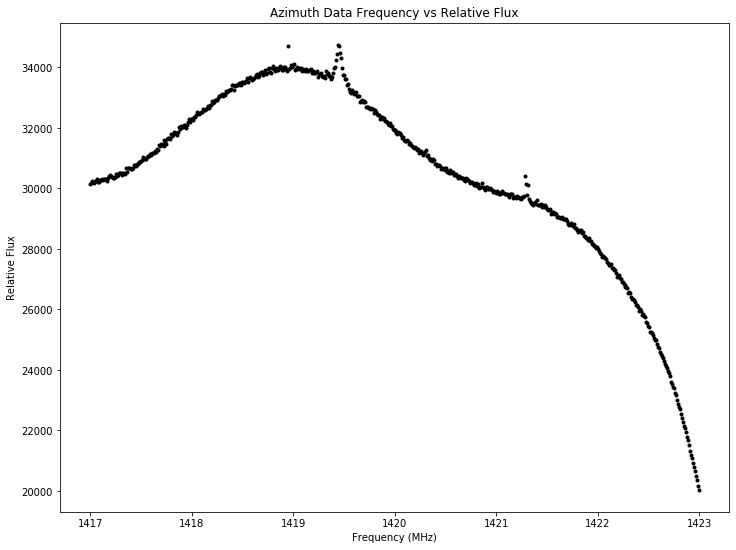

In [68]:
freq = np.arange(1417,1423,.009766)

print(len(freq))

#print(array_az_spectra[1][153:870])
plt.plot(freq,array_az_spectra[1][204:819], '.k')

plt.title('Azimuth Data Frequency vs Relative Flux')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Relative Flux')

In [69]:
flux_az = [] #creating empty list to store the average flux along each azimuth pointing (20 total)

for i in range(0,20):
    flux_az.append(array_az_spectra[i][204:819]) #for loop that selects the flux values between 204 and 819 for each pointing
    
avg_flux_az = np.asarray(flux_az).mean(axis = 1) #averaging all the selected flux values within each of the 20 pointings
print(avg_flux_az) #printing averaged data 

[39339.92049756 30440.33281951 28525.05458537 22171.24251545
 11666.46065041 16845.12620813 17822.90379512 14509.98937398
 13639.34624878 20705.10007642 20290.7110813  41027.79746341
 51995.55441138 30717.35064553 31241.33156911 23700.3768
 18995.57297561 13089.34325691 19127.56574634 25131.54198374]


In [70]:
for file in az_files: #printing files so that the numerical order of the files can be made into a list
    print(file)

/Users/mmessere/Desktop/lsa-ast361/Work/mmessere/Lab7/radio-astronomy/sun_azimuth/sun-1_0.dat
/Users/mmessere/Desktop/lsa-ast361/Work/mmessere/Lab7/radio-astronomy/sun_azimuth/sun-2_0.dat
/Users/mmessere/Desktop/lsa-ast361/Work/mmessere/Lab7/radio-astronomy/sun_azimuth/sun-3_0.dat
/Users/mmessere/Desktop/lsa-ast361/Work/mmessere/Lab7/radio-astronomy/sun_azimuth/sun-4_0.dat
/Users/mmessere/Desktop/lsa-ast361/Work/mmessere/Lab7/radio-astronomy/sun_azimuth/sun-5_0.dat
/Users/mmessere/Desktop/lsa-ast361/Work/mmessere/Lab7/radio-astronomy/sun_azimuth/sun-6_0.dat
/Users/mmessere/Desktop/lsa-ast361/Work/mmessere/Lab7/radio-astronomy/sun_azimuth/sun-7_0.dat
/Users/mmessere/Desktop/lsa-ast361/Work/mmessere/Lab7/radio-astronomy/sun_azimuth/sun-8_0.dat
/Users/mmessere/Desktop/lsa-ast361/Work/mmessere/Lab7/radio-astronomy/sun_azimuth/sun-9_0.dat
/Users/mmessere/Desktop/lsa-ast361/Work/mmessere/Lab7/radio-astronomy/sun_azimuth/sun0_0.dat
/Users/mmessere/Desktop/lsa-ast361/Work/mmessere/Lab7/radio-a

In [71]:
file_order_az = [-1,-2,-3,-4,-5,-6,-7,-8,-9,0,10,1,2,3,4,5,6,7,8,9] #making a list of the files so that data is plotted correctly
file_array_az = np.array(file_order_az) #making the list as an array

## Fitting a Gaussian to the Azimuth Data  

1.2451555033340536
6.396627807684441
553789.4728193667
15.062907382137697


Text(0, 0.5, 'Relative Flux')

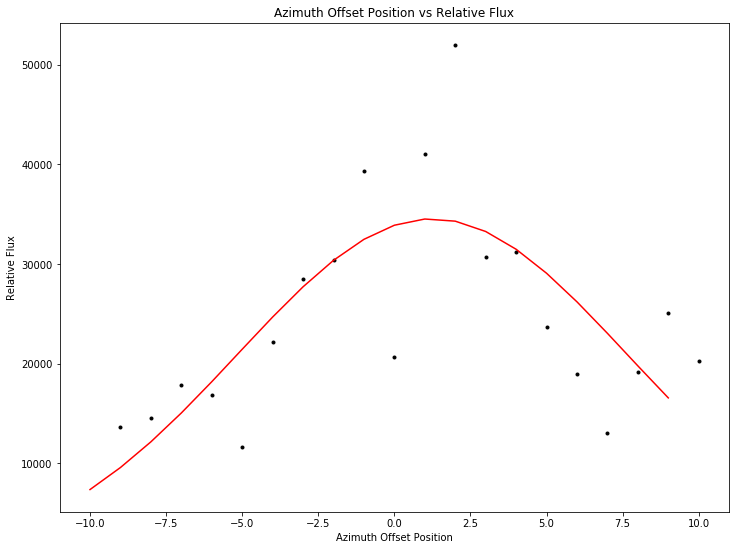

In [72]:
from scipy.optimize import curve_fit #importing curve fit library 

def gaussian(x, mu, sig, amp): #defining a function with four variables 
    return ((1/(np.sqrt(2*np.pi)*sig)) * (np.exp(-((x - mu)/sig)**2/2))) * amp #the gaussian equation

mu0,sig0,amp0 = (0,7,3000) #setting approximations for the three unknown variables 

coeffs, filterr = curve_fit(gaussian,file_array_az,avg_flux_az,p0=(mu0,sig0,amp0)) #fitting the data to the gaussian equation 
#plt.plot(file_order,gaussian(file_array, coeffs[0], coeffs[1], coeffs[2]),'.r') 
plt.plot(file_order_az,avg_flux_az, '.k') #plotting the actual 20 data points to compare to the curve 

print(coeffs[0])
print(coeffs[1])
print(coeffs[2])

mu = coeffs[0] #defining the solved coefficients with curve fit 
sig = coeffs[1]
amp = coeffs[2]

plt.plot(np.arange(-10,10,1), gaussian(np.arange(-10,10,1), mu, sig, amp),'r-') #plotting the gaussian function with the same range of values

fwhm_1 = 2*np.sqrt(2*np.log(2))*sig #the equation for the full width half max 
print(fwhm_1)

#maximum = np.max(gaussian(np.arange(-10,10,1), mu, sig, amp))
#plt.axhline(maximum/2)
#plt.axvline(-6.3)
#plt.axvline(8.7)
#print("FWHM = ", 6.3 + 8.7)

plt.title('Azimuth Offset Position vs Relative Flux')
plt.xlabel('Azimuth Offset Position')
plt.ylabel('Relative Flux')

## The Elevation Data 

Text(0, 0.5, 'Relative Flux')

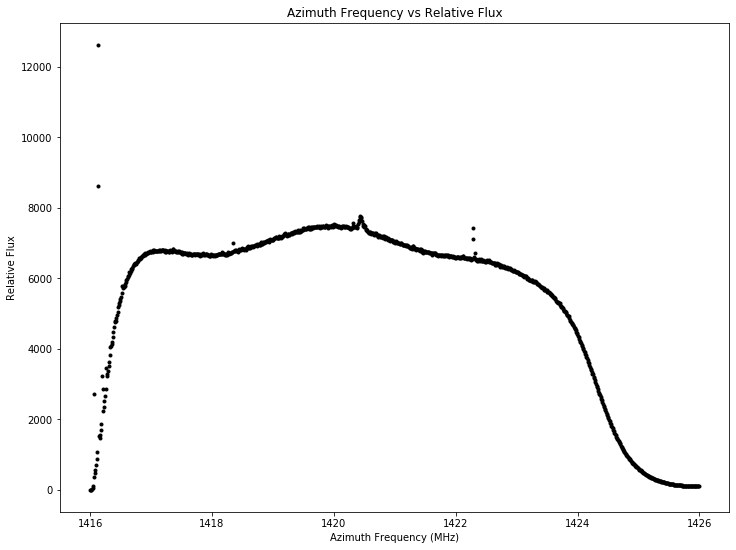

In [73]:
freq = np.arange(1416,1426,.009766) #the range of frequencies and change in frequencies used
lines = [1417,1424] #these lines used to determine where to select the data range

#for line in lines:
#plt.axvline(lines,color='r', lw = .5)
        
plt.plot(freq,array_el_spectra[1], '.k') #plotting flux as a function of frequency 

plt.title('Azimuth Frequency vs Relative Flux')
plt.xlabel('Azimuth Frequency (MHz)')
plt.ylabel('Relative Flux')

615


Text(0, 0.5, 'Relative Flux')

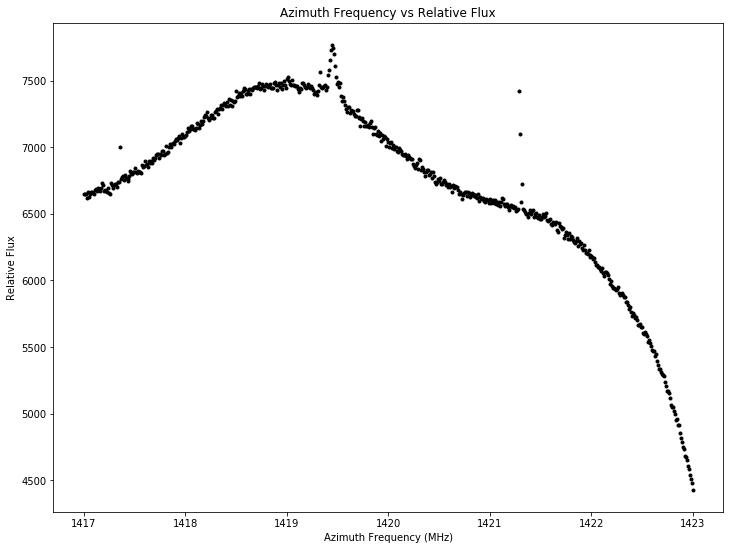

In [74]:
freq = np.arange(1417,1423,.009766)

print(len(freq))

#print(array_az_spectra[1][153:870])
plt.plot(freq,array_el_spectra[1][204:819], '.k') #plotting the range of frequencies that is of interest for this experiment

plt.title('Azimuth Frequency vs Relative Flux')
plt.xlabel('Azimuth Frequency (MHz)')
plt.ylabel('Relative Flux')

In [75]:
flux_el = [] #creating empty list to store elevation data

for i in range(0,15): #the number of elevation files
    flux_el.append(array_el_spectra[i][204:819]) #appending the frequencies within the slected range for each elevation pointing

avg_flux_el = np.asarray(flux_el).mean(axis = 1) #aveaging the flux values over all the frequencies within each pointing 
print(avg_flux_el) #printing average flux values 

[12423.19422439  6713.75226667  9754.78671707 10463.7093561
  5350.15773659 16845.33327967  5004.82050732 23110.96036098
 18585.26856748 17535.59005203 10056.50433171 11828.81374309
  9438.03748618  4695.03305203  5687.6375252 ]


In [76]:
for file in el_files: #printing files so that they can be later sorted 
    print(file)

/Users/mmessere/Desktop/lsa-ast361/Work/mmessere/Lab7/radio-astronomy/sun_elevation/sun_el_m1
/Users/mmessere/Desktop/lsa-ast361/Work/mmessere/Lab7/radio-astronomy/sun_elevation/sun_el_m2
/Users/mmessere/Desktop/lsa-ast361/Work/mmessere/Lab7/radio-astronomy/sun_elevation/sun_el_m3
/Users/mmessere/Desktop/lsa-ast361/Work/mmessere/Lab7/radio-astronomy/sun_elevation/sun_el_m4
/Users/mmessere/Desktop/lsa-ast361/Work/mmessere/Lab7/radio-astronomy/sun_elevation/sun_el_m5
/Users/mmessere/Desktop/lsa-ast361/Work/mmessere/Lab7/radio-astronomy/sun_elevation/sun_el_p1
/Users/mmessere/Desktop/lsa-ast361/Work/mmessere/Lab7/radio-astronomy/sun_elevation/sun_el_p10
/Users/mmessere/Desktop/lsa-ast361/Work/mmessere/Lab7/radio-astronomy/sun_elevation/sun_el_p2
/Users/mmessere/Desktop/lsa-ast361/Work/mmessere/Lab7/radio-astronomy/sun_elevation/sun_el_p3
/Users/mmessere/Desktop/lsa-ast361/Work/mmessere/Lab7/radio-astronomy/sun_elevation/sun_el_p4
/Users/mmessere/Desktop/lsa-ast361/Work/mmessere/Lab7/radio

In [77]:
file_order_el = [-1,-2,-3,-4,-5,1,10,2,3,4,5,6,7,8,9] #creating list with file order 
file_array_el = np.array(file_order_el) #making list into an array

## Fitting a Gaussian to the Elevation Data  

2.0211142386759176
4.182387680875579
192639.6180591866
9.84877034701632


Text(0, 0.5, 'Relative Flux')

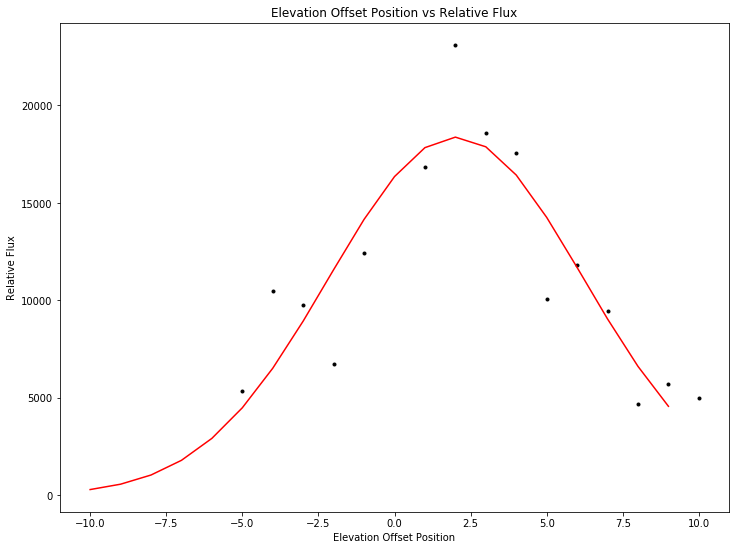

In [78]:
from scipy.optimize import curve_fit #importing curve fit library 

def gaussian(x, mu, sig, amp): #defining a function with four variables 
    return ((1/(np.sqrt(2*np.pi)*sig)) * (np.exp(-((x - mu)/sig)**2/2))) * amp #the gaussian equation

mu0,sig0,amp0 = (0,7,3000) #setting approximations for the three unknown variables 

coeffs, filterr = curve_fit(gaussian,file_array_el,avg_flux_el,p0=(mu0,sig0,amp0)) #fitting the data to the gaussian equation 
#plt.plot(file_order,gaussian(file_array, coeffs[0], coeffs[1], coeffs[2]),'.r') 
plt.plot(file_order_el,avg_flux_el, '.k') #plotting the actual 15 data points to compare to the curve 

print(coeffs[0])
print(coeffs[1])
print(coeffs[2])

mu = coeffs[0] #defining the solved coefficients with curve fit 
sig = coeffs[1]
amp = coeffs[2]

plt.plot(np.arange(-10,10,1), gaussian(np.arange(-10,10,1), mu, sig, amp),'r-') #plotting the gaussian function with the same range of values

fwhm_2 = 2*np.sqrt(2*np.log(2))*sig #the equation for the full width half max 
print(fwhm_2)

plt.title('Elevation Offset Position vs Relative Flux')
plt.xlabel('Elevation Offset Position')
plt.ylabel('Relative Flux')

Text(0, 0.5, 'Relative Flux')

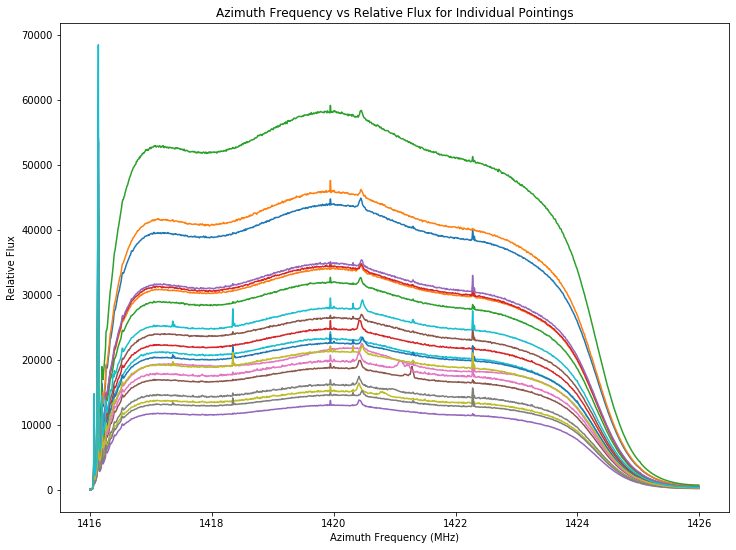

In [79]:
freq = np.arange(1416,1426,.009766)

for i in range(0,20):
    plt.plot(freq,array_az_spectra[i][:]) #plotting the range of fluxes for all the frequencies within each pointing 
 
plt.show

plt.title('Azimuth Frequency vs Relative Flux for Individual Pointings')
plt.xlabel('Azimuth Frequency (MHz)')
plt.ylabel('Relative Flux')

Text(0, 0.5, 'Relative Flux')

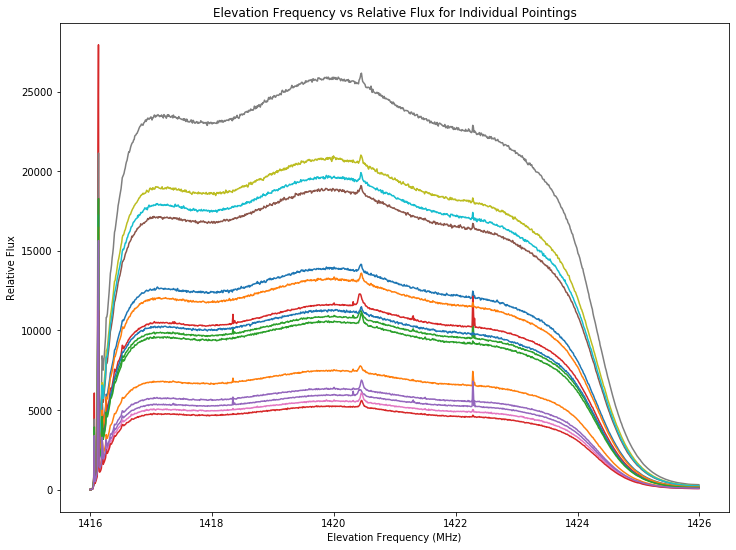

In [80]:
freq = np.arange(1416,1426,.009766)

for i in range(0,15):
    plt.plot(freq,array_el_spectra[i][:]) #plotting the range of fluxes for all the frequencies within each pointing 
    
plt.show

plt.title('Elevation Frequency vs Relative Flux for Individual Pointings')
plt.xlabel('Elevation Frequency (MHz)')
plt.ylabel('Relative Flux')